In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model 
#it includes linear and logistic regression

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

 

In [2]:
from sklearn.datasets import load_iris

iris=load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
x=iris.data
y=iris.target

In [5]:
irisDF=pd.DataFrame(x,columns=iris.feature_names)
irisDF["species"]=y
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


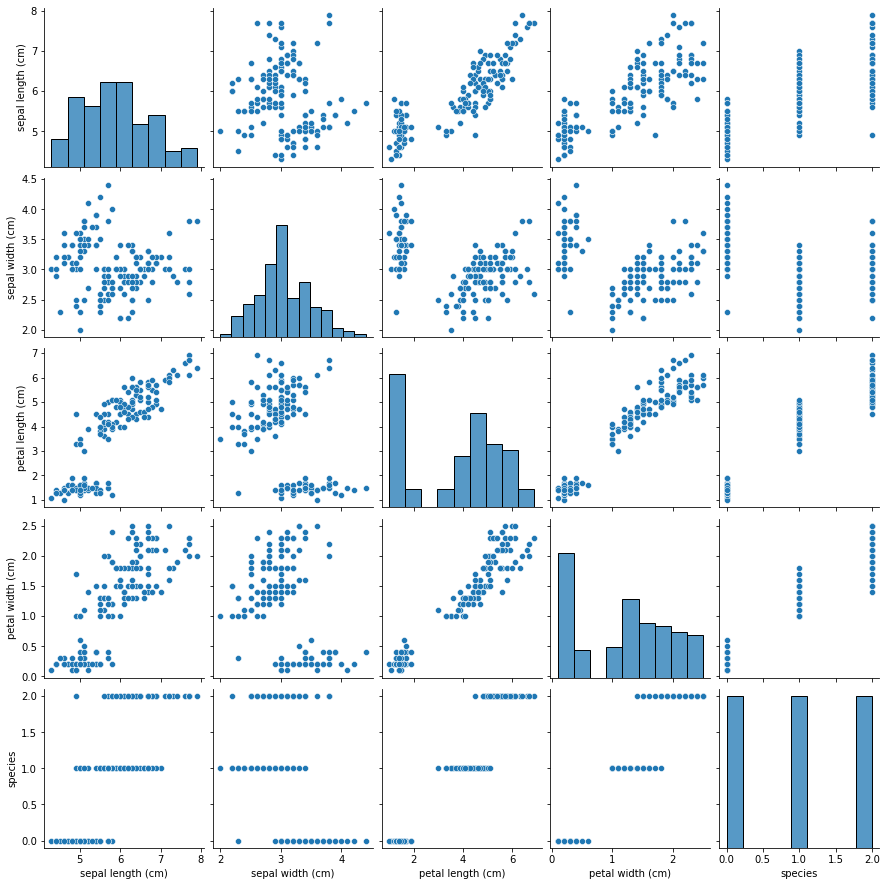

In [6]:
sns.pairplot(irisDF)

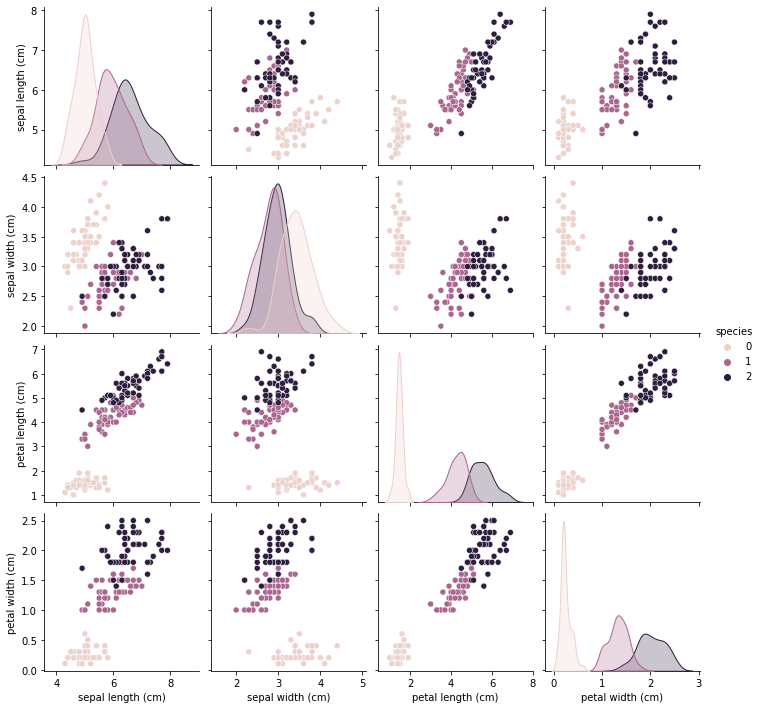

In [7]:
sns.pairplot(irisDF,hue="species")

- Which feature is the least distinguishing?

- Do you think the classes are seprable based on features?

In [8]:
# sklearn documetation calls the model classifier
model=linear_model.LogisticRegression()
model.fit(x,y)
ypred=model.predict(x)  #returns the predicted class (with highest strength)
ypred_ps=model.predict_proba(x)  #returns stength of belonging to classes

/Users/naghmehmomeni/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Sklearn finds the parameters that minimizes the cost function.
- Behind the scenes, this is done in mutiple steps. 
- The default number of iterations (steps) of the algorithm is not enough for the optimization to find solutions.
- What is the default number of iterations?

In [9]:
linear_model.LogisticRegression?

In [10]:
model=linear_model.LogisticRegression(max_iter=1000)
model.fit(x,y)
ypred=model.predict(x)
ypred_ps=model.predict_proba(x)

In [11]:
print(ypred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
print(ypred_ps)

[[9.81579028e-01 1.84209573e-02 1.44796627e-08]
 [9.71349907e-01 2.86500630e-02 3.01442199e-08]
 [9.85284354e-01 1.47156339e-02 1.23163687e-08]
 [9.76083240e-01 2.39167200e-02 3.96363361e-08]
 [9.85231429e-01 1.47685587e-02 1.19875304e-08]
 [9.70196316e-01 2.98036099e-02 7.39148694e-08]
 [9.86782826e-01 1.32171543e-02 1.99455259e-08]
 [9.76147071e-01 2.38529009e-02 2.76955600e-08]
 [9.79653445e-01 2.03465240e-02 3.05443622e-08]
 [9.68772653e-01 3.12273156e-02 3.16864626e-08]
 [9.76210733e-01 2.37892478e-02 1.93520385e-08]
 [9.75215550e-01 2.47844062e-02 4.38950474e-08]
 [9.74242568e-01 2.57574108e-02 2.14848856e-08]
 [9.91883757e-01 8.11623906e-03 3.88191186e-09]
 [9.87995930e-01 1.20040672e-02 2.84024006e-09]
 [9.86629814e-01 1.33701730e-02 1.29236593e-08]
 [9.87957561e-01 1.20424300e-02 9.24943390e-09]
 [9.81333386e-01 1.86665938e-02 1.97428680e-08]
 [9.56053527e-01 4.39464043e-02 6.89349461e-08]
 [9.83975297e-01 1.60246826e-02 2.06102043e-08]
 [9.46134696e-01 5.38652172e-02 8.679669

-Are these really probabiltites?

In [14]:
model.score(x,y) #returns the accuracy of the model

0.9733333333333334

In [15]:
model.score?

In [16]:
from sklearn.metrics import classification_report

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)

In [18]:
xtrain.shape

(112, 4)

In [19]:
ytrain.shape

(112,)

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)
model=linear_model.LogisticRegression(max_iter=1000)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
ypred_ps=model.predict_proba(xtest)
print(model.score(xtest,ytest))
print(classification_report(ytest,ypred))

0.8947368421052632
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.79      0.92      0.85        12
           2       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.89        38
weighted avg       0.90      0.89      0.89        38



- In binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.

- What if we only used a subset of features?

In [31]:
xnew=x[:,0:1]
#only using sepal length
model=linear_model.LogisticRegression(max_iter=1000)
model.fit(xnew,y)
ypred=model.predict(xnew)
ypred_ps=model.predict_proba(xnew)


print(model.score(xnew,y))
print(classification_report(y,ypred))

0.7466666666666667
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        50
           1       0.64      0.60      0.62        50
           2       0.73      0.74      0.73        50

    accuracy                           0.75       150
   macro avg       0.74      0.75      0.74       150
weighted avg       0.74      0.75      0.74       150



In [30]:
xnew

array([[3.5],
       [3. ],
       [3.2],
       [3.1],
       [3.6],
       [3.9],
       [3.4],
       [3.4],
       [2.9],
       [3.1],
       [3.7],
       [3.4],
       [3. ],
       [3. ],
       [4. ],
       [4.4],
       [3.9],
       [3.5],
       [3.8],
       [3.8],
       [3.4],
       [3.7],
       [3.6],
       [3.3],
       [3.4],
       [3. ],
       [3.4],
       [3.5],
       [3.4],
       [3.2],
       [3.1],
       [3.4],
       [4.1],
       [4.2],
       [3.1],
       [3.2],
       [3.5],
       [3.6],
       [3. ],
       [3.4],
       [3.5],
       [2.3],
       [3.2],
       [3.5],
       [3.8],
       [3. ],
       [3.8],
       [3.2],
       [3.7],
       [3.3],
       [3.2],
       [3.2],
       [3.1],
       [2.3],
       [2.8],
       [2.8],
       [3.3],
       [2.4],
       [2.9],
       [2.7],
       [2. ],
       [3. ],
       [2.2],
       [2.9],
       [2.9],
       [3.1],
       [3. ],
       [2.7],
       [2.2],
       [2.5],
       [3.2],
      

- How do we asses this score? What is the benchmark?
-What would be the acuracy of random guessing?

In [ ]:
import sys
!{sys.executable} -m pip install mlxtend


In [32]:
from mlxtend.plotting import plot_decision_regions

In [33]:
plot_decision_regions?

Text(0.5, 0, 'sepal length [cm]')

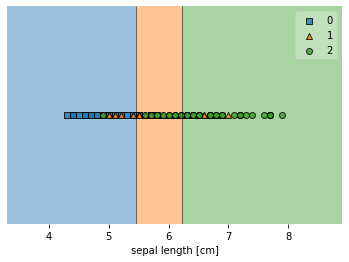

In [34]:
plot_decision_regions(xnew,y,clf=model,legend=1)
plt.xlabel('sepal length [cm]')
#markers show the true class

In [35]:
xnew=x[:,0:2]
#using the first two features
model=linear_model.LogisticRegression(max_iter=1000)
model.fit(xnew,y)
ypred=model.predict(xnew)
ypred_ps=model.predict_proba(xnew)

print(model.score(xnew,y))
print(classification_report(y,ypred))

0.82
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.73      0.74      0.73        50
           2       0.73      0.72      0.73        50

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150



Text(0, 0.5, 'sepal width [cm]')

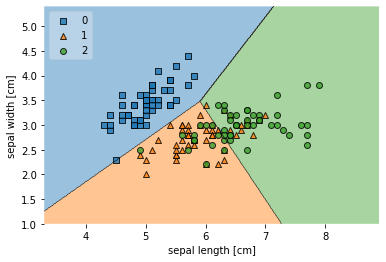

In [36]:
plot_decision_regions(xnew,y,clf=model,legend=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')

Adding features

In [37]:
xnew=x[:,0:3]

model=linear_model.LogisticRegression(max_iter=1000)
model.fit(xnew,y)
ypred=model.predict(xnew)
ypred_ps=model.predict_proba(xnew)

print(model.score(xnew,y))
print(classification_report(y,ypred))

0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [38]:
xnew=x 

model=linear_model.LogisticRegression(max_iter=1000)
model.fit(xnew,y)
ypred=model.predict(xnew)
ypred_ps=model.predict_proba(xnew)

print(model.score(xnew,y))
print(classification_report(y,ypred))

0.9733333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



### Non-linear patterns

0.512
              precision    recall  f1-score   support

           0       0.51      0.52      0.51       250
           1       0.51      0.51      0.51       250

    accuracy                           0.51       500
   macro avg       0.51      0.51      0.51       500
weighted avg       0.51      0.51      0.51       500



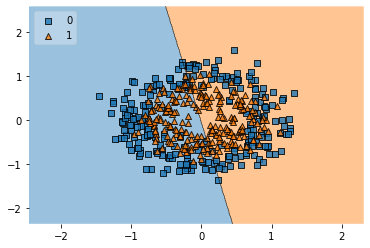

In [48]:
from sklearn.datasets import make_circles

x,y=make_circles(n_samples=500,noise=.2,factor=.6)
#change noise the ratio of diameters

model=linear_model.LogisticRegression(max_iter=1000)
model.fit(x,y)
ypred=model.predict(x)


plot_decision_regions(x,y,clf=model,legend=2);


print(model.score(x,y))
print(classification_report(y,ypred))
#notice the accuracy

- We want to add non-linear terms to capture the nonlinearity in the data pattern.
- if we have two features, how many new parameters are added? 

- $f(x)=w_0+w_1X_1+w_2X_2$
- $g(x)=w_0+w_1X_1+w_2X_2+w_{11}X_1^2+w_{22}X_2^2+w_{12}X_1X_2$

0.838
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       250
           1       0.82      0.86      0.84       250

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



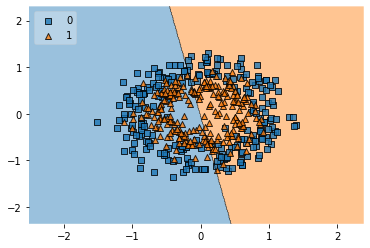

In [49]:
x,y=make_circles(n_samples=500,noise=.2,factor=.6)

from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
xnew=poly.fit_transform(x)



model2=linear_model.LogisticRegression(max_iter=1000)
model2.fit(xnew,y)
ypred=model2.predict(xnew)

plot_decision_regions(x,y,clf=model,legend=2); 
#showing the boundries with basic logistic regression classifier

print(model2.score(xnew,y))
print(classification_report(y,ypred))

In [50]:
xnew

array([[ 1.        ,  0.95852402,  0.73272741,  0.9187683 ,  0.70233683,
         0.53688946],
       [ 1.        ,  0.59599111, -0.98520672,  0.3552054 , -0.58717444,
         0.97063228],
       [ 1.        ,  0.42826875, -0.44497634,  0.18341412, -0.19056946,
         0.19800394],
       ...,
       [ 1.        ,  0.73897416,  0.21609938,  0.54608282,  0.15969186,
         0.04669894],
       [ 1.        ,  1.13884207,  0.48392941,  1.29696126,  0.55111917,
         0.23418768],
       [ 1.        ,  0.77427557, -0.46285882,  0.59950265, -0.35838028,
         0.21423829]])

### Titanic dataset

In [51]:
df=pd.read_csv("titanic_data.csv")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Only fousing on 4 features

In [53]:
D=df[["Pclass","Sex","Fare","Survived"]]

In [54]:
D

,Pclass,Sex,Fare,Survived
0,3,male,7.2500,0
1,1,female,71.2833,1
2,3,female,7.9250,1
3,1,female,53.1000,1
4,3,male,8.0500,0
...,...,...,...,...
886,2,male,13.0000,0
887,1,female,30.0000,1
888,3,female,23.4500,0
889,1,male,30.0000,1


- Is 1,2,3 for Pclass interpreted as real numbers?

- All the categorical variables should be translated to numbers before the analysis

In [55]:
dum=pd.get_dummies(D["Pclass"])
dum

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [56]:
D=D.join(dum)
D

,Pclass,Sex,Fare,Survived,1,2,3
0,3,male,7.2500,0,0,0,1
1,1,female,71.2833,1,1,0,0
2,3,female,7.9250,1,0,0,1
3,1,female,53.1000,1,1,0,0
4,3,male,8.0500,0,0,0,1
...,...,...,...,...,...,...,...
886,2,male,13.0000,0,0,1,0
887,1,female,30.0000,1,1,0,0
888,3,female,23.4500,0,0,0,1
889,1,male,30.0000,1,1,0,0


In [57]:
dum=pd.get_dummies(D["Sex"])
D=D.join(dum)
D


,Pclass,Sex,Fare,Survived,1,2,3,female,male
0,3,male,7.2500,0,0,0,1,0,1
1,1,female,71.2833,1,1,0,0,1,0
2,3,female,7.9250,1,0,0,1,1,0
3,1,female,53.1000,1,1,0,0,1,0
4,3,male,8.0500,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,2,male,13.0000,0,0,1,0,0,1
887,1,female,30.0000,1,1,0,0,1,0
888,3,female,23.4500,0,0,0,1,1,0
889,1,male,30.0000,1,1,0,0,0,1


In [58]:
D.drop(["Pclass","Sex"],axis=1,inplace=True)


In [59]:
D

,Fare,Survived,1,2,3,female,male
0,7.2500,0,0,0,1,0,1
1,71.2833,1,1,0,0,1,0
2,7.9250,1,0,0,1,1,0
3,53.1000,1,1,0,0,1,0
4,8.0500,0,0,0,1,0,1
...,...,...,...,...,...,...,...
886,13.0000,0,0,1,0,0,1
887,30.0000,1,1,0,0,1,0
888,23.4500,0,0,0,1,1,0
889,30.0000,1,1,0,0,0,1


In [60]:
D.columns=["price","survived","pclass1","pclass2","pclass3","female","male"]
D

,price,survived,pclass1,pclass2,pclass3,female,male
0,7.2500,0,0,0,1,0,1
1,71.2833,1,1,0,0,1,0
2,7.9250,1,0,0,1,1,0
3,53.1000,1,1,0,0,1,0
4,8.0500,0,0,0,1,0,1
...,...,...,...,...,...,...,...
886,13.0000,0,0,1,0,0,1
887,30.0000,1,1,0,0,1,0
888,23.4500,0,0,0,1,1,0
889,30.0000,1,1,0,0,0,1


In [61]:
#we want to have survived as the class

D=D[["price","pclass1","pclass2","pclass3","female","male","survived"]]

In [62]:
D

,price,pclass1,pclass2,pclass3,female,male,survived
0,7.2500,0,0,1,0,1,0
1,71.2833,1,0,0,1,0,1
2,7.9250,0,0,1,1,0,1
3,53.1000,1,0,0,1,0,1
4,8.0500,0,0,1,0,1,0
...,...,...,...,...,...,...,...
886,13.0000,0,1,0,0,1,0
887,30.0000,1,0,0,1,0,1
888,23.4500,0,0,1,1,0,0
889,30.0000,1,0,0,0,1,1


In [73]:
x=D[["price","pclass1","pclass2","pclass3","female","male"]]
y=D["survived"]

In [74]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)

model=linear_model.LogisticRegression(max_iter=1000)
model.fit(xtrain,ytrain)

ypred=model.predict(xtest)
ypred_ps=model.predict_proba(xtest)

print(model.score(xtest,ytest))
print(classification_report(ytest,ypred))

0.7623318385650224
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       138
           1       0.71      0.64      0.67        85

    accuracy                           0.76       223
   macro avg       0.75      0.74      0.74       223
weighted avg       0.76      0.76      0.76       223



In [75]:
#for binary classifications, these are actually probabilities
ypred_ps[:10]

array([[0.91194623, 0.08805377],
       [0.90954736, 0.09045264],
       [0.41564461, 0.58435539],
       [0.89685941, 0.10314059],
       [0.10223586, 0.89776414],
       [0.61403459, 0.38596541],
       [0.76707544, 0.23292456],
       [0.63873626, 0.36126374],
       [0.63873626, 0.36126374],
       [0.76189416, 0.23810584]])

How to asses accuracy? Is the data blanaced?

In [76]:
y.mean()

0.3838383838383838

In [77]:
 
model=linear_model.LogisticRegression(max_iter=1000)
model.fit(x,y)

ypred=model.predict(x)
ypred_ps=model.predict_proba(x)

print(model.score(x,y))
print(classification_report(y,ypred))

0.7856341189674523
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.69      0.71       342

    accuracy                           0.79       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891



In [78]:
cm=metrics.confusion_matrix(y,ypred)
print(cm)

[[465  84]
 [107 235]]


In [79]:
tn, fp, fn, tp= metrics.confusion_matrix(y,ypred).ravel()

In [80]:
(tn,fp,fn,tp)
#interpret these numbers

(465, 84, 107, 235)

### ROC curve

- We use ROC curve to tune hyper parameters
- True positive rate: recall
- False positive rate: 1-specificity

- For imblanaced datasets, precision vs recall curve is more common. 

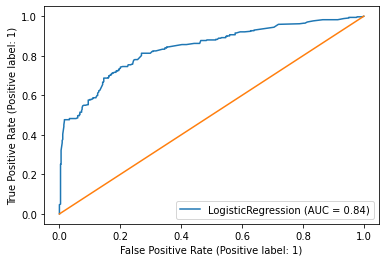

In [81]:
metrics.plot_roc_curve(model,x,y)
plt.plot([0,1],[0,1])
plt.show()

- AUC summerizes the performance of this classfier and can be sued to compare different classifiers.
- Find the points on the curve that correspond to Threshold=0 and Threshold=1.


In [84]:
fpr,tpr,thresholds=metrics.roc_curve(y,ypred_ps[:,1])

In [85]:
print(fpr)

[0.         0.         0.         0.         0.         0.
 0.00364299 0.00364299 0.00364299 0.00364299 0.00364299 0.00364299
 0.00364299 0.00364299 0.00364299 0.00364299 0.00364299 0.00364299
 0.00364299 0.00364299 0.00364299 0.00364299 0.00364299 0.00364299
 0.00364299 0.00364299 0.00364299 0.00364299 0.00364299 0.00364299
 0.00364299 0.00364299 0.00546448 0.00546448 0.00546448 0.00546448
 0.00546448 0.00546448 0.00546448 0.00910747 0.00910747 0.00910747
 0.01092896 0.01092896 0.01092896 0.01457195 0.01457195 0.01457195
 0.01457195 0.01639344 0.01639344 0.02185792 0.02550091 0.0273224
 0.03278689 0.03278689 0.04189435 0.04371585 0.05464481 0.0582878
 0.06010929 0.06010929 0.06010929 0.06010929 0.06557377 0.06557377
 0.06739526 0.06739526 0.07103825 0.07285974 0.07285974 0.07285974
 0.07468124 0.07468124 0.07468124 0.07650273 0.08014572 0.08196721
 0.0856102  0.09289617 0.09471767 0.09471767 0.09471767 0.09471767
 0.09471767 0.09653916 0.10018215 0.10018215 0.10200364 0.10564663
 0.10

In [86]:
thresholds

array([1.95822223, 0.95822223, 0.93153101, 0.92952472, 0.92440836,
       0.91551257, 0.91520296, 0.91239701, 0.91225495, 0.90837176,
       0.90759346, 0.90530345, 0.90486893, 0.90467465, 0.90451311,
       0.90404211, 0.9034924 , 0.90343468, 0.90325453, 0.90279328,
       0.90264649, 0.90253934, 0.90248264, 0.90119559, 0.90087885,
       0.89901633, 0.8987465 , 0.89835047, 0.89781498, 0.8977103 ,
       0.89760392, 0.89330107, 0.89304439, 0.89255861, 0.8079351 ,
       0.80663483, 0.80622712, 0.80598219, 0.80573702, 0.80565524,
       0.8050001 , 0.80467189, 0.80401424, 0.8035199 , 0.80153313,
       0.80136688, 0.80125045, 0.80115061, 0.80103408, 0.80053409,
       0.63711365, 0.61938148, 0.60816317, 0.60456615, 0.60190941,
       0.60041273, 0.60035633, 0.59927801, 0.59744101, 0.59677916,
       0.59642715, 0.59632656, 0.59587798, 0.59571027, 0.59523212,
       0.59481673, 0.59479785, 0.59431724, 0.59368318, 0.59358237,
       0.59338073, 0.59302778, 0.59272518, 0.59259907, 0.59254

In [87]:
tpr

array([0.        , 0.00292398, 0.01461988, 0.01754386, 0.03508772,
       0.04678363, 0.0497076 , 0.06725146, 0.07017544, 0.0877193 ,
       0.09356725, 0.0994152 , 0.10233918, 0.10818713, 0.11111111,
       0.11988304, 0.12280702, 0.13157895, 0.13450292, 0.14619883,
       0.15204678, 0.15789474, 0.16666667, 0.18128655, 0.1871345 ,
       0.19298246, 0.19883041, 0.20760234, 0.21929825, 0.22222222,
       0.22807018, 0.25146199, 0.25146199, 0.26023392, 0.28947368,
       0.30116959, 0.30701754, 0.30994152, 0.32163743, 0.35672515,
       0.35964912, 0.37134503, 0.37719298, 0.38304094, 0.40350877,
       0.43859649, 0.44152047, 0.44736842, 0.4502924 , 0.47076023,
       0.47660819, 0.47660819, 0.47660819, 0.47660819, 0.47660819,
       0.48245614, 0.48245614, 0.48245614, 0.48245614, 0.48538012,
       0.48538012, 0.48830409, 0.49415205, 0.49707602, 0.49707602,
       0.50292398, 0.50292398, 0.51461988, 0.51461988, 0.51461988,
       0.51754386, 0.52339181, 0.52923977, 0.53508772, 0.53801

In [82]:
metrics.roc_auc_score(y,ypred_ps[:,1])

0.8377645692859959